# Task 4 : Image Classification - CIFAR 10 Dataset

170498071/170498071 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                       

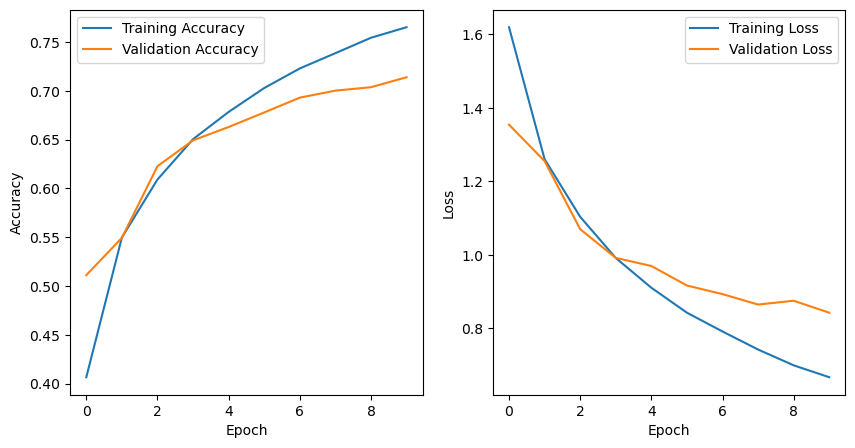

In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0


# Define the CNN model
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model1.summary()

# Train the model
history = model1.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot the training accuracy and loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       147584    
                                                      

2023-07-25 11:52:54.042485: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


625/625 [==============================] - 16s 18ms/step - loss: 1.8363 - accuracy: 0.3032 - val_loss: 1.4117 - val_accuracy: 0.4763
Epoch 2/10
625/625 [==============================] - 11s 17ms/step - loss: 1.3492 - accuracy: 0.5073 - val_loss: 1.0975 - val_accuracy: 0.6012
Epoch 3/10
625/625 [==============================] - 11s 17ms/step - loss: 1.1447 - accuracy: 0.5954 - val_loss: 1.0283 - val_accuracy: 0.6339
Epoch 4/10
625/625 [==============================] - 11s 18ms/step - loss: 1.0191 - accuracy: 0.6416 - val_loss: 0.8721 - val_accuracy: 0.6949
Epoch 5/10
625/625 [==============================] - 11s 17ms/step - loss: 0.9317 - accuracy: 0.6750 - val_loss: 0.8275 - val_accuracy: 0.7061
Epoch 6/10
625/625 [==============================] - 11s 17ms/step - loss: 0.8598 - accuracy: 0.7057 - val_loss: 0.8024 - val_accuracy: 0.7185
Epoch 7/10
625/625 [==============================] - 11s 18ms/step - loss: 0.8031 - accuracy: 0.7230 - val_loss: 0.7728 - val_accuracy: 0.7354
Epo

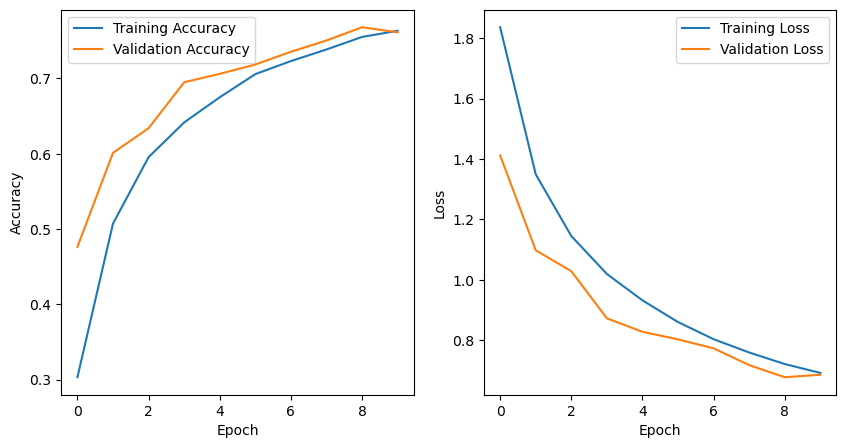

In [2]:

model2 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


# Compile the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model2.summary()

# Train the model
history = model2.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot the training accuracy and loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)      

2023-07-25 11:55:22.555266: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


625/625 [==============================] - 19s 22ms/step - loss: 1.8609 - accuracy: 0.3791 - val_loss: 1.6688 - val_accuracy: 0.4004
Epoch 2/20
625/625 [==============================] - 13s 21ms/step - loss: 1.1891 - accuracy: 0.5784 - val_loss: 1.3362 - val_accuracy: 0.5511
Epoch 3/20
625/625 [==============================] - 13s 21ms/step - loss: 0.9585 - accuracy: 0.6635 - val_loss: 0.8749 - val_accuracy: 0.6944
Epoch 4/20
625/625 [==============================] - 13s 21ms/step - loss: 0.8162 - accuracy: 0.7158 - val_loss: 0.7815 - val_accuracy: 0.7224
Epoch 5/20
625/625 [==============================] - 13s 21ms/step - loss: 0.7248 - accuracy: 0.7471 - val_loss: 1.0622 - val_accuracy: 0.6592
Epoch 6/20
625/625 [==============================] - 13s 20ms/step - loss: 0.6535 - accuracy: 0.7755 - val_loss: 0.6731 - val_accuracy: 0.7632
Epoch 7/20
625/625 [==============================] - 13s 21ms/step - loss: 0.5903 - accuracy: 0.7988 - val_loss: 0.6701 - val_accuracy: 0.7708
Epo

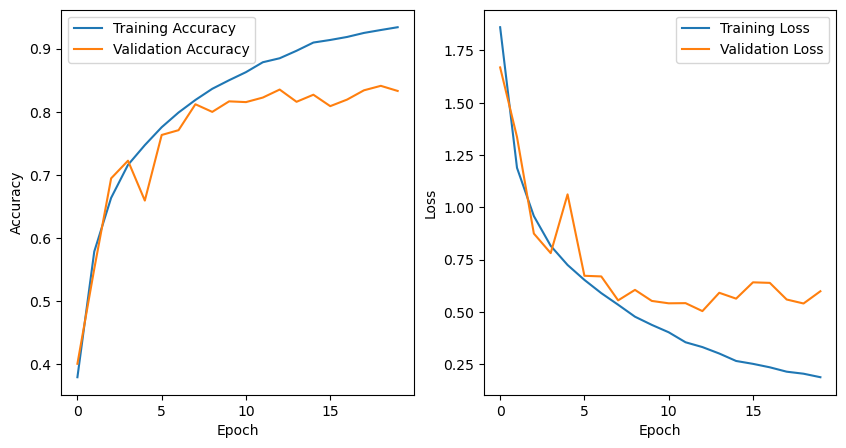

In [3]:
model3 = models.Sequential([
    # Block 1
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Fully connected layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


# Compile the model
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model3.summary()

# Train the model
history = model3.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model3.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot the training accuracy and loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

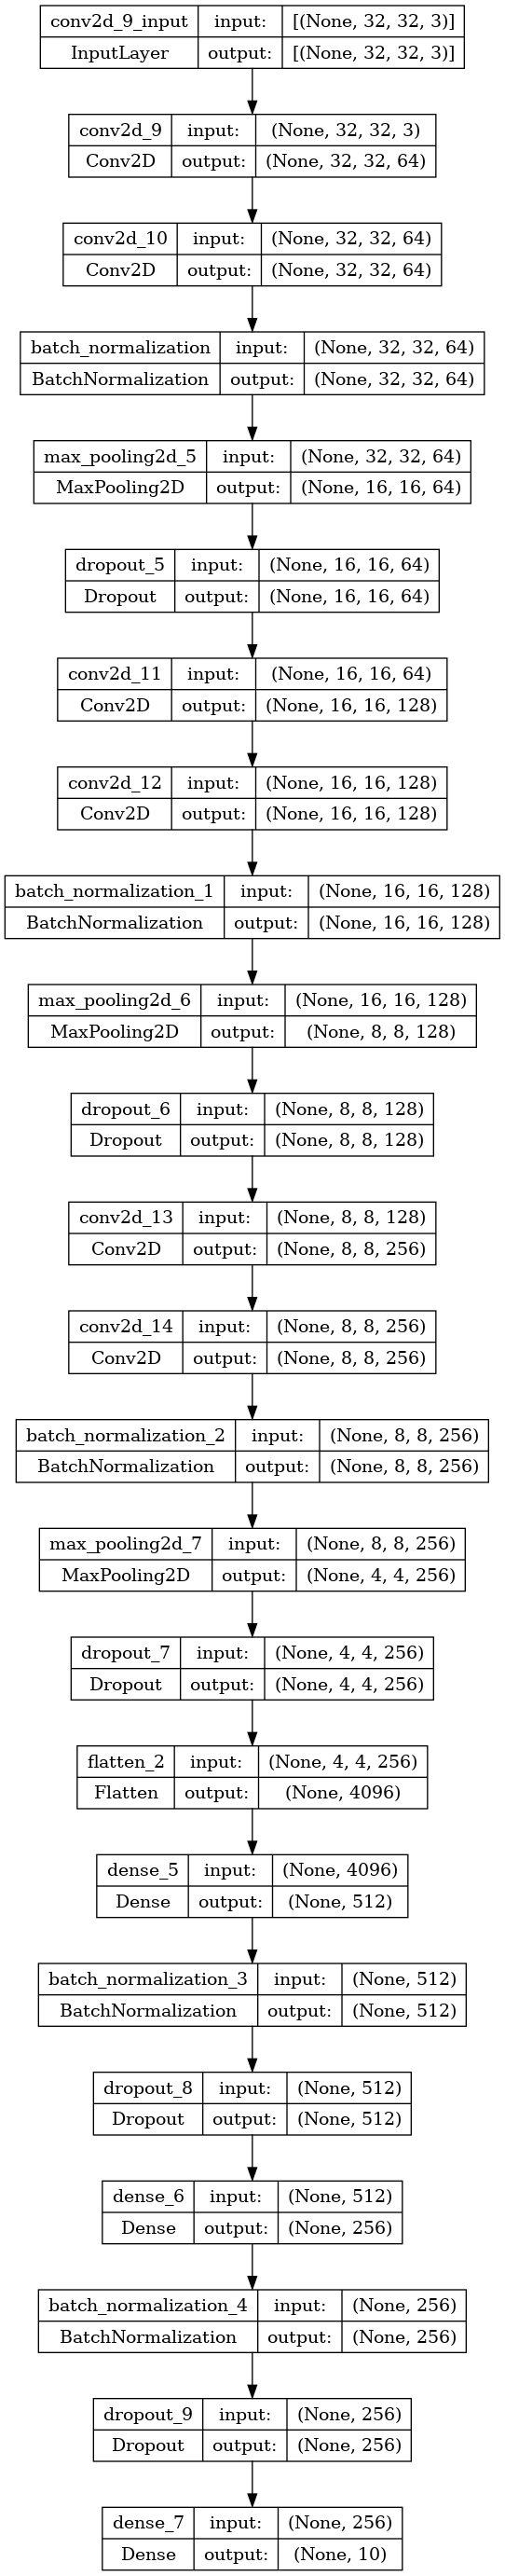

In [4]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model3, to_file='model3_architecture.png', show_shapes=True, show_layer_names=True)

In [5]:
# Save the entire model to a single file in the HDF5 format
model3.save("model3.h5")

from tensorflow.keras.models import load_model
load_model3 = load_model("model3.h5")

313/313 [==============================] - 1s 3ms/step


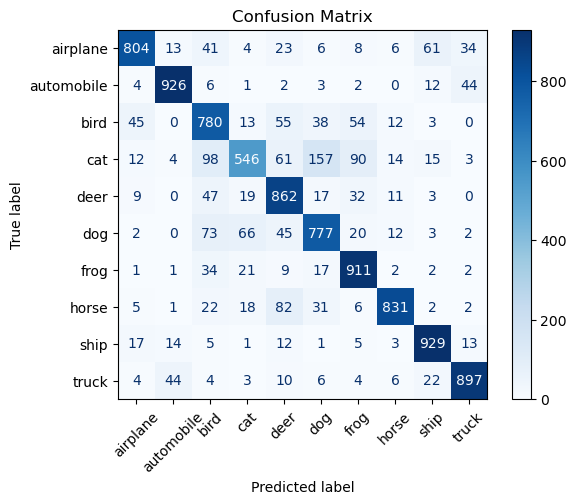

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Get the model predictions on the test set
predictions = model3.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Display the confusion matrix
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)  # Set the rotation angle for x-axis labels to 45 degrees
plt.show()


## Inferences : 

* **High Diagonal Values:** The values along the diagonal of the confusion matrix are relatively high. This indicates that the model is performing well on correctly predicting the classes for a significant portion of the test set.

* **Misclassification Among Similar Classes:** There are some misclassifications observed among classes that share similarities in appearance. For example, 'cat' is often misclassified as 'dog,' and 'bird' is misclassified as 'airplane.' This suggests that the model may have difficulty distinguishing similar objects.

* **Good Performance on Dominant Classes:** Some classes, such as 'airplane,' 'automobile,' and 'ship,' have relatively high values along the diagonal, indicating good performance on these dominant classes.

* **Challenges in Minority Classes:** Classes like 'bird,' 'deer,' and 'truck' have lower values on the diagonal, indicating that the model struggles to correctly classify instances from these classes. These classes may require more data or targeted model adjustments to improve performance.

* **Balanced Predictions:** The distribution of misclassifications appears to be relatively balanced across different classes, indicating that the model is not heavily biased towards any specific class.

1/1 [==============================] - 0s 383ms/step


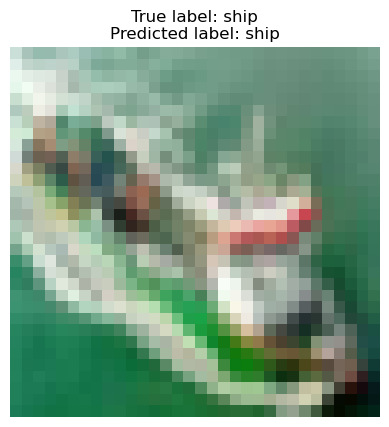

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the model
model3 = load_model("model3.h5")

# Function to display image and prediction
def display_image_and_prediction(image, true_label, predicted_label):
    class_names = [
        'airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck'
    ]

    plt.imshow(image)
    plt.axis('off')
    plt.title(f"True label: {class_names[int(true_label)]}\nPredicted label: {class_names[int(predicted_label)]}")
    plt.show()

# Select a test image index (e.g., i=0)
i = 15

# Get the model's prediction for the test image
test_image = np.expand_dims(test_images[i], axis=0)  # Add batch dimension to the single image
prediction = model3.predict(test_image)
predicted_label = np.argmax(prediction)

# Display the image and its prediction
display_image_and_prediction(test_images[i], test_labels[i], predicted_label)
